In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, SeparableConv2D
from keras.layers import MaxPooling2D, AvgPool2D
from keras.layers import Flatten
from keras.layers import Dense
from keras import applications
from keras.models import Sequential, Model, load_model
from keras import optimizers

from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
import os
from keras.preprocessing import image
import numpy as np
from keras.layers import Dropout
import matplotlib.pyplot as plt
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.regularizers import l2
from time import time
from tensorflow.python.keras.callbacks import TensorBoard
from ann_visualizer.visualize import ann_viz
import tensorflow as tf

Using TensorFlow backend.


In [2]:
import os
import tensorflow as tf

os.environ['CUDA_VISIBLE_DEVICES'] = ''

if tf.test.gpu_device_name():
    print('GPU found')
else:
    print("No GPU found")

# No GPU found

GPU found


In [3]:
height, width = 200, 200
continue_training = True
LOF, MOF, HOF, VHOF = 1, 3, 5, 7     # low order features, medium order features, high order features, very high
channels = 3
pooling_size = 2
output_classes = 2
batch_size = 3
steps_per_epoch = 1669
validation_steps = 400
epochs = 3

In [4]:
def create_model():
    # import sequential model and all the required layers
    #make model
    model=Sequential()
    model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(200,200,3)))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(filters=128,kernel_size=2,padding="same",activation="relu"))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(500,activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(2,activation="softmax"))
    model.compile(loss='categorical_crossentropy', optimizer='adam', 
                  metrics=['accuracy'])
    return model

In [5]:
def train_validate_model(my_model):
    classes = ['covid','normal']

    train_datagen = ImageDataGenerator(
        rescale=1. / 255,
        horizontal_flip=True,
        vertical_flip=True,
        shear_range=0.2,
        zoom_range=0.2
    )

    training_set = train_datagen.flow_from_directory(
        'dataset/',
        target_size=(height, width),
        batch_size=batch_size,
        classes=classes,
        class_mode='categorical',
        shuffle=True,
        subset='training'
    )

    validation_set = train_datagen.flow_from_directory(
        'test/',
        target_size=(height, width),
        batch_size=batch_size,
        classes=classes,
        class_mode='categorical',
        shuffle=True
    )

    history = my_model.fit_generator(
        training_set,
        epochs=epochs,
        steps_per_epoch=steps_per_epoch,
        validation_steps=validation_steps,
        validation_data=validation_set
    )

    print('Model score: ')
    score = my_model.evaluate_generator(validation_set, steps=100)

    print("Loss: ", score[0], "Accuracy: ", score[1])

    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    return my_model


def save(my_model):
    my_model.save('xray.h5')


def load():
    return load_model('xray.h5')


Existing model found
Model loaded
Found 80 images belonging to 2 classes.
Found 14 images belonging to 2 classes.
Epoch 1/3
1669/1669 [==============================] - 434s 260ms/step - loss: 0.0273 - accuracy: 0.9923 - val_loss: 0.0000e+00 - val_accuracy: 0.9991
Epoch 2/3
1669/1669 [==============================] - 396s 237ms/step - loss: 0.0122 - accuracy: 0.9966 - val_loss: 5.9605e-08 - val_accuracy: 1.0000
Epoch 3/3
1669/1669 [==============================] - 386s 231ms/step - loss: 0.0036 - accuracy: 0.9990 - val_loss: 0.0026 - val_accuracy: 0.8732
Model score: 
Loss:  0.0 Accuracy:  0.8464285731315613


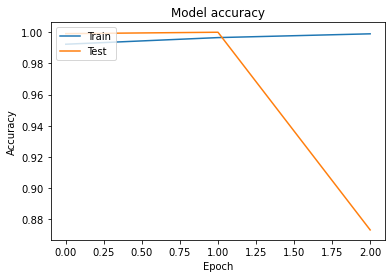

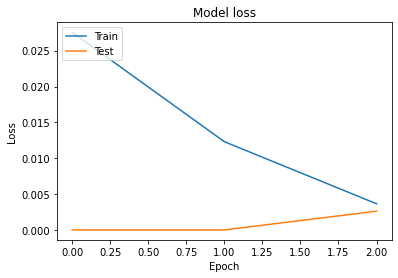

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 200, 200, 16)      208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 100, 100, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 100, 100, 32)      2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 64)        8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 25, 25, 64)       

In [6]:
if os.path.exists('xray.h5'):
    print('Existing model found')
    model = load()
    print('Model loaded')
    if continue_training:
        model = train_validate_model(model)
        save(model)
else:
    print('No existing model present, creating/training new model')
    model = create_model()
    mode = train_validate_model(model)
    save(model)
    print('Model saved')

# predict(model)
model.summary()

In [7]:
from os import walk

f = []
for (dirpath, dirnames, filenames) in walk('test/normal/'):
    f.extend(filenames)
    break

In [8]:
f

['NORMAL2-IM-1090-0001.jpeg',
 'NORMAL2-IM-1142-0001-0001.jpeg',
 'NORMAL2-IM-1200-0001.jpeg',
 'NORMAL2-IM-1222-0001.jpeg',
 'NORMAL2-IM-1277-0001-0001.jpeg']

In [9]:
classes=['covid','normal']
import cv2
import time 
runTotal=len(f)
time1 = time.time()
for i in f:
    cur_img = cv2.imread('test/normal/'+str(i))
    cur_img = cv2.resize(cur_img,(200,200))
    cur_img =  np.expand_dims(cur_img, axis=0)
    print(classes[np.argmax(model.predict(cur_img))])
timetotal = time.time() - time1
fps = float(runTotal/timetotal)
print("FPS=%.2f, total frames = %.0f , time = %.4f seconds" %(fps,runTotal,timetotal))

covid
covid
covid
covid
covid
FPS=4.77, total frames = 5 , time = 1.0485 seconds


In [12]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

ImportError: Failed to import `pydot`. Please install `pydot`. For example with `pip install pydot`.